## Data Preprocessing

#### Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Reading DSCOVR PlasMag data

In [2]:
data_frames = {}
for file in os.listdir('./raw_data/'):
     year = str(file).split('_')[-2]
     path = os.path.join('raw_data',file,file+'.csv')
     df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
     print(path)
     data_frames['df_'+year] = df

C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2016_v01\dsc_fc_summed_spectra_2016_v01.csv


C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2017_v01\dsc_fc_summed_spectra_2017_v01.csv


C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2018_v01\dsc_fc_summed_spectra_2018_v01.csv


C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2019_v01\dsc_fc_summed_spectra_2019_v01.csv


C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2020_v01\dsc_fc_summed_spectra_2020_v01.csv


C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2021_v01\dsc_fc_summed_spectra_2021_v01.csv


C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2022_v01\dsc_fc_summed_spectra_2022_v01.csv


C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\3465327592.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


raw_data\dsc_fc_summed_spectra_2023_v01\dsc_fc_summed_spectra_2023_v01.csv


In [3]:
df16, df17,df18,df19,df20,df21,df22,df23 = data_frames['df_2016'], data_frames['df_2017'], data_frames['df_2018'], data_frames['df_2019'], data_frames['df_2020'], data_frames['df_2021'], data_frames['df_2022'],data_frames['df_2023']
df_final = pd.concat([df16,df17,df18,df19,df20,df21,df22])

In [4]:
attributes = ['date', 'WindSpeedX', 'WindSpeedY','WindSpeedZ']
for i in range(4,54):
    attributes.append('fcp'+str(i))

df_final.columns = attributes

#### Reading Kp dataframe

In [11]:
ind = pd.read_csv('raw_data\Kp_ap_since_1932.txt', delimiter=' ')
ind_filter = ind[(ind['YYYY']>=2016) & (ind['YYYY']<=2022)]
ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)
ind_filter.head()

C:\Users\Ananya\AppData\Local\Temp\ipykernel_24860\115839134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)


,YYYY,MM,DD,h,hh._m,days,days_m,Kp,ap,D
245448,2016,1,1,0.0,1.5,30681.000,30681.0625,6.000,80,1
245449,2016,1,1,3.0,4.5,30681.125,30681.1875,5.333,56,1
245450,2016,1,1,6.0,7.5,30681.250,30681.3125,5.000,48,1
245451,2016,1,1,9.0,10.5,30681.375,30681.4375,3.333,18,1
245452,2016,1,1,12.0,13.5,30681.500,30681.5625,1.667,6,1


#### Checking Null values

C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


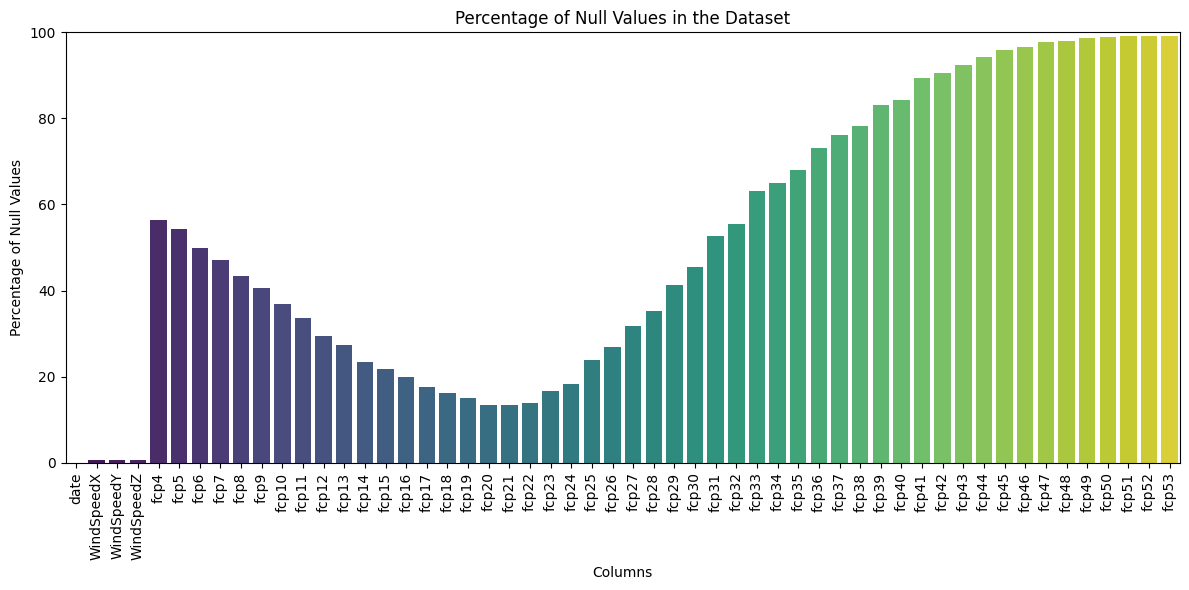

In [13]:
def print_null_proportion(df):
    null_percentage = (df.isnull().sum() / len(df)) * 100

    # Creating a bar plot of null value percentages
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
    plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
    plt.xlabel("Columns")
    plt.ylabel("Percentage of Null Values")
    plt.title("Percentage of Null Values in the Dataset")
    plt.ylim(0, 100) # Setting the y-axis scale from 0 to 100
    plt.tight_layout()
    plt.show()

print_null_proportion(df_final)

In [14]:
for k in data_frames:
    num_nulls = data_frames[k].isnull().sum().sum()
    print(k,'has a total of',num_nulls/data_frames[k].shape[0],'% (',num_nulls,') nulls')

df_2016 has a total of 30.86239777213762 % ( 8755045 ) nulls
df_2017 has a total of 30.70994101978691 % ( 16141145 ) nulls
df_2018 has a total of 31.242830280011916 % ( 16781149 ) nulls
df_2019 has a total of 31.24171738451935 % ( 8007877 ) nulls
df_2020 has a total of 28.850437656305825 % ( 12920380 ) nulls
df_2021 has a total of 23.672530441400305 % ( 12442282 ) nulls
df_2022 has a total of 20.29900494672755 % ( 10669157 ) nulls
df_2023 has a total of 21.038439207650274 % ( 3696033 ) nulls


### Merging the datasets

In [15]:
# rounding th hour to the nearest 3 hours
def truncateHour(x):
    if x< 3:
        return 0
    elif x< 6:
        return 3
    elif x < 9:
        return 6
    elif x< 12:
        return 9
    elif x< 15:
        return 12
    elif x< 18:
        return 15
    elif x< 21:
        return 18
    else:
        return 21

In [16]:
df_final['YYYY'] = df_final['date'].dt.year
df_final['MM'] = df_final['date'].dt.month
df_final['DD'] = df_final['date'].dt.day
df_final['h'] = df_final['date'].dt.hour
df_final['h'] = df_final['h'].apply(truncateHour)

##### Grouping based on Year, month, date and hour and then calculating mean based on each group

In [17]:
df_grouped = df_final.groupby(['YYYY','MM','DD','h']).mean()
df_grouped

date  WindSpeedX  WindSpeedY  WindSpeedZ  \
YYYY MM DD h                                                            
2016 1  1  0  2016-01-01 01:29:30    4.433160   -1.247880  -13.165854   
           3  2016-01-01 04:29:30    3.448769   -3.864323   -8.984068   
           6  2016-01-01 07:29:30    4.407694   -5.729229   -6.420560   
           9  2016-01-01 10:29:30    3.758710   -6.973925    3.080465   
           12 2016-01-01 13:29:30    6.514989   -6.250111   -0.786576   
...                           ...         ...         ...         ...   
2022 12 31 9  2022-12-31 10:29:30   -4.575782    1.086207    2.755094   
           12 2022-12-31 13:29:30   -2.912565    0.545443   -1.746772   
           15 2022-12-31 16:29:30   -3.569145    2.629413    0.167908   
           18 2022-12-31 19:29:30   -4.063840    1.834405   -1.244176   
           21 2022-12-31 22:29:30   -4.004869    1.863977   -0.416700   

                     fcp4        fcp5        fcp6        fcp7        fcp8  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   139.338250  108.341150  131.678031  127.960636  124.528562   
           6   143.819967  103.094027  126.340200  129.495920  124.643217   
           9          NaN         NaN         NaN         NaN         NaN   
           12  142.064460  102.750320  127.700920  130.539498  124.235998   
...                   ...         ...         ...         ...         ...   
2022 12 31 9    20.038541    0.253126    2.232621   10.446358   12.015030   
           12   25.665688    0.231726    0.301693    7.798967   15.294495   
           15   32.373597    0.231726    0.533728   11.987406   18.079204   
           18   24.981998    0.231726    0.869348   12.322342   12.377256   
           21   24.341184    0.231726    0.497367    3.097159    9.419372   

                     fcp9  ...       fcp44       fcp45       fcp46  \
YYYY MM DD h               ...                                       
2016 1  1  0          NaN  ...         NaN         NaN         NaN   
           3   108.572063  ...  161.363000  134.080562  151.425344   
           6    96.828230  ...  163.193200  131.601167  151.214300   
           9          NaN  ...         NaN         NaN         NaN   
           12   73.482044  ...  162.297380  133.708920  152.504700   
...                   ...  ...         ...         ...         ...   
2022 12 31 9     1.288711  ...         NaN         NaN         NaN   
           12    0.234433  ...  372.433667  295.602368  362.085000   
           15    0.313125  ...  351.656905  288.231412  386.202500   
           18    0.253563  ...  316.262016  291.814545  388.993750   
           21    0.248380  ...  339.274714  277.562000         NaN   

                    fcp47       fcp48       fcp49       fcp50       fcp51  \
YYYY MM DD h                                                                
2016 1  1  0          NaN         NaN         NaN         NaN         NaN   
           3   140.448156  132.193750  151.046906  151.407406  134.467309   
           6   144.231933  129.541733  147.492067  156.671133  137.356233   
           9          NaN         NaN         NaN         NaN         NaN   
           12  142.948180  129.320420  148.748020  156.235200  136.425440   
...                   ...         ...         ...         ...         ...   
2022 12 31 9          NaN         NaN         NaN         NaN         NaN   
           12         NaN         NaN         NaN         NaN         NaN   
           15         NaN         NaN         NaN         NaN         NaN   
           18         NaN         NaN         NaN         NaN         NaN   
           21         NaN         NaN         NaN         NaN         NaN   

                    fcp52       fcp53  
YYYY MM DD h                           
2016 1  1  0          NaN         NaN  
           3   162.754562  142.775667  
    

##### Merging based on common values

In [18]:
merged_df = pd.merge(df_grouped, ind_filter, on=['YYYY', 'DD', 'MM', 'h'], how='inner')
merged_df.head()

,YYYY,DD,MM,h,date,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,...,fcp50,fcp51,fcp52,fcp53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,2016-01-01 01:29:30,4.433160,-1.247880,-13.165854,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,2016-01-01 04:29:30,3.448769,-3.864323,-8.984068,139.338250,108.341150,...,151.407406,134.467309,162.754562,142.775667,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,2016-01-01 07:29:30,4.407694,-5.729229,-6.420560,143.819967,103.094027,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,2016-01-01 10:29:30,3.758710,-6.973925,3.080465,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,2016-01-01 13:29:30,6.514989,-6.250111,-0.786576,142.064460,102.750320,...,156.235200,136.425440,159.369940,145.061380,13.5,30681.500,30681.5625,1.667,6,1


In [19]:
merged_df.columns

Index(['YYYY', 'DD', 'MM', 'h', 'date', 'WindSpeedX', 'WindSpeedY',
       'WindSpeedZ', 'fcp4', 'fcp5', 'fcp6', 'fcp7', 'fcp8', 'fcp9', 'fcp10',
       'fcp11', 'fcp12', 'fcp13', 'fcp14', 'fcp15', 'fcp16', 'fcp17', 'fcp18',
       'fcp19', 'fcp20', 'fcp21', 'fcp22', 'fcp23', 'fcp24', 'fcp25', 'fcp26',
       'fcp27', 'fcp28', 'fcp29', 'fcp30', 'fcp31', 'fcp32', 'fcp33', 'fcp34',
       'fcp35', 'fcp36', 'fcp37', 'fcp38', 'fcp39', 'fcp40', 'fcp41', 'fcp42',
       'fcp43', 'fcp44', 'fcp45', 'fcp46', 'fcp47', 'fcp48', 'fcp49', 'fcp50',
       'fcp51', 'fcp52', 'fcp53', 'hh._m', 'days', 'days_m', 'Kp', 'ap', 'D'],
      dtype='object')

In [20]:
merged_df.to_pickle('./data/dates_df')

C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


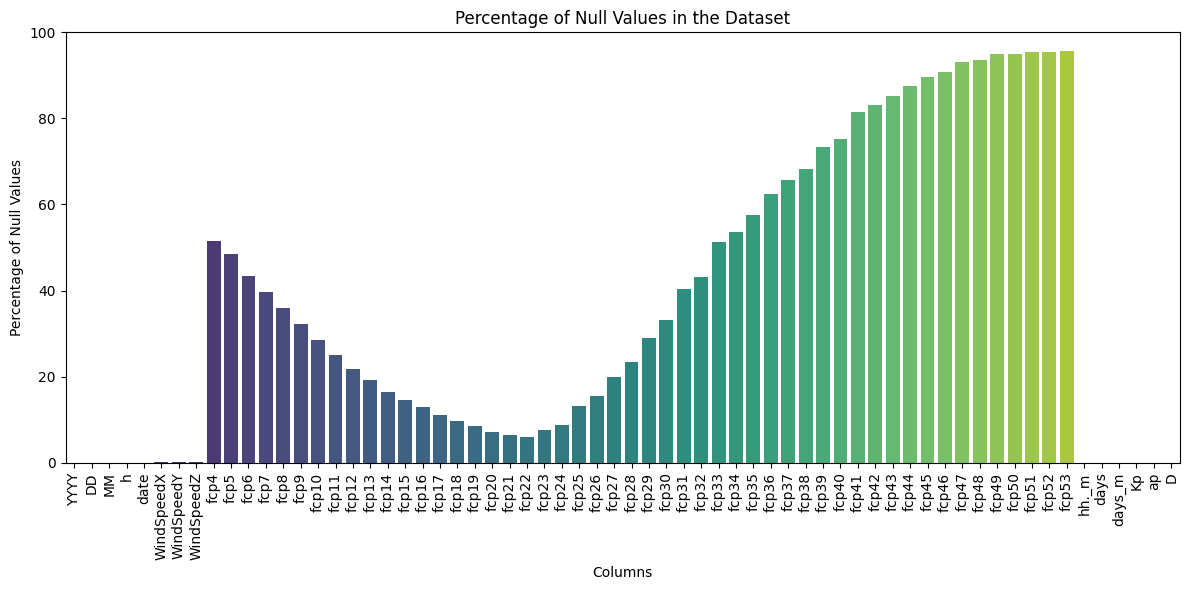

In [21]:
print_null_proportion(merged_df)

In [22]:
filtered_df= merged_df.drop(['hh._m','days','days_m','date','YYYY','DD','MM','h','D'],axis=1)

C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


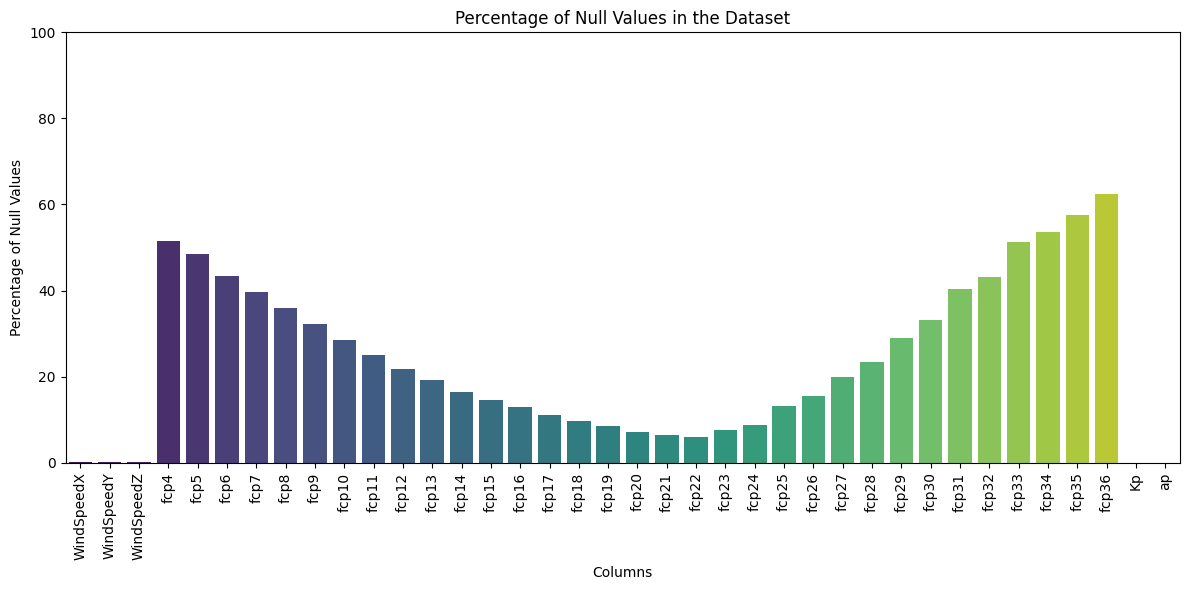

In [23]:
total = filtered_df.shape[0]

cols_to_drop = filtered_df.isnull().sum()[merged_df.isnull().sum()>total*0.65].index
filtered_df.drop(cols_to_drop,axis =1, inplace = True)
print_null_proportion(filtered_df)

##### Imputing missing values using KNNImputer on the filtered dataset and saving it into a new dataframe

C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ananya\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


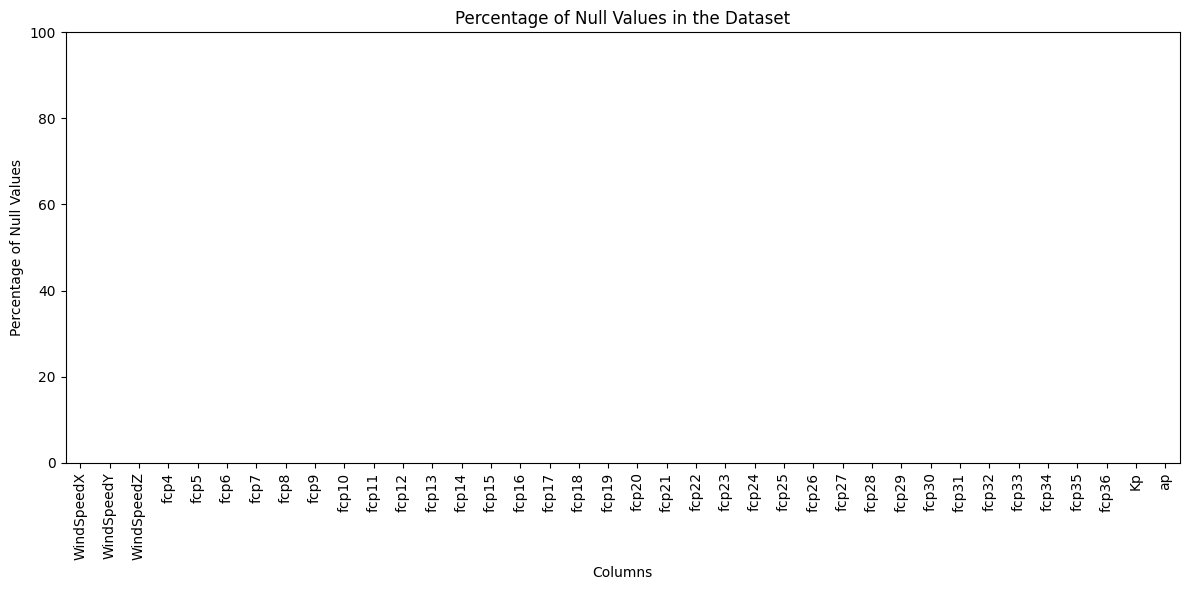

In [24]:
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
postImputation = imputer.fit_transform(filtered_df)
columnNames=filtered_df.columns.tolist()
enhanced_df = pd.DataFrame(postImputation, columns = columnNames)
print_null_proportion(enhanced_df)

In [25]:
enhanced_df.to_pickle('./data/final_df')

### Dimensionality Reduction using PCA

In [27]:
# Applying Standard Scaler to the 'fcp' columns
pca_columns = [x for x in filtered_df.columns if 'fcp' in x]
enhanced_standarized = enhanced_df.copy()
enhanced_standarized = pd.DataFrame(StandardScaler().fit_transform(enhanced_df), columns = enhanced_df.columns)
enhanced_standarized

,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,fcp6,fcp7,fcp8,fcp9,fcp10,...,fcp29,fcp30,fcp31,fcp32,fcp33,fcp34,fcp35,fcp36,Kp,ap
0,1.487795,-0.359055,-6.386987,-0.485696,-0.522638,-0.832233,-0.196552,-0.261954,-0.428330,-0.415359,...,1.826771,0.850505,0.970554,0.673439,0.405632,0.041407,-0.373957,-0.614872,3.579217,7.013861
1,1.152662,-1.184712,-4.362110,0.595116,1.392398,0.131293,0.093839,-0.279685,-0.324007,-0.572983,...,-3.113461,-4.272191,-3.787678,-3.236690,-3.446556,-3.576463,-3.141846,-3.858514,3.035520,4.670888
2,1.479125,-1.773211,-3.120826,0.667751,1.286579,0.056519,0.113385,-0.278463,-0.428918,-0.705564,...,-3.161743,-4.289377,-3.832405,-3.302196,-3.481777,-3.588566,-3.180935,-3.903040,2.764079,3.889897
3,1.258180,-2.165994,1.479697,-0.837235,-0.709691,0.062805,-0.096841,-0.412412,-0.190709,-0.194359,...,1.505079,1.178905,1.008289,0.446947,-0.182006,-0.563659,-0.801619,-0.880193,1.405243,0.961181
4,2.196549,-1.937583,-0.392775,0.639299,1.279648,0.075580,0.126670,-0.282803,-0.637477,-0.793818,...,-3.124254,-4.338202,-3.910549,-3.293620,-3.451969,-3.634680,-3.222397,-3.897359,0.047223,-0.210305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,-1.579278,0.377501,1.322148,-1.338357,-0.787406,-1.682013,-1.402197,-1.478797,-1.282402,-1.359754,...,1.720386,1.490954,0.793412,0.035638,-0.152866,-0.466285,-1.272597,-2.132669,0.047223,-0.210305
17164,-1.013040,0.206855,-0.857715,-1.247159,-0.787838,-1.709062,-1.435900,-1.443846,-1.291820,-1.384740,...,0.818059,1.770741,1.598293,0.952817,0.895006,1.053731,0.178003,-1.089329,1.133802,0.668310
17165,-1.236571,0.864482,0.069398,-1.138445,-0.787838,-1.705812,-1.382578,-1.414168,-1.291117,-1.359029,...,0.354753,1.775975,1.831171,1.342250,1.229106,1.105663,0.057878,-0.981270,0.862361,0.375438
17166,-1.404989,0.613606,-0.614352,-1.258239,-0.787838,-1.701110,-1.378314,-1.474937,-1.291650,-1.345641,...,0.348992,1.668169,1.521305,1.070457,1.137379,0.999059,-0.021022,-0.839970,1.405243,0.961181


In [40]:
pca_df = enhanced_standarized[pca_columns]

##### Scree plot as part of PCA to understand perform factor analysis to help determine the number of components or factors to retain for further analysis

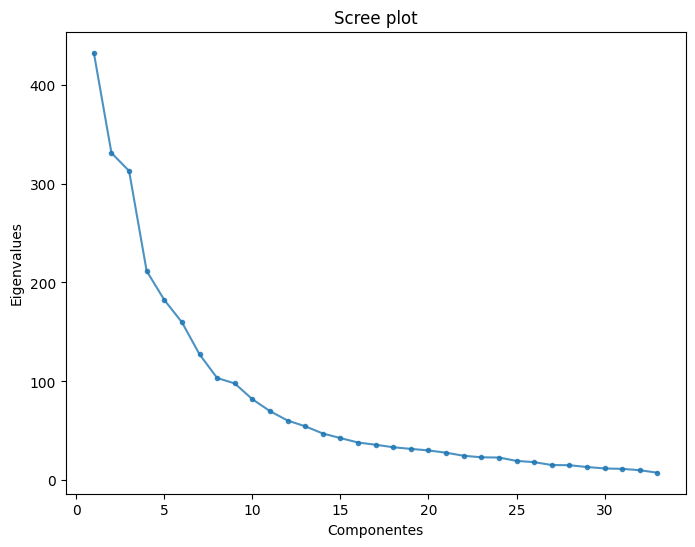

In [41]:
myPCA = PCA().fit(pca_df);
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

##### Plot to visualize the explained variance in the Principal Component Analysis (PCA).

Text(0.5, 1.0, 'Percentage of Variance Explained by Component')

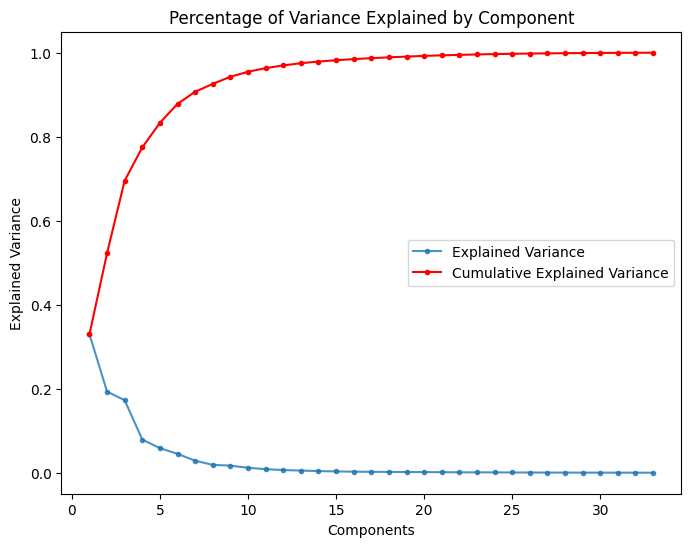

In [42]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_)+1), myPCA.explained_variance_ratio_, alpha=0.8, marker='.', label="Explained Variance")
y_label = plt.ylabel('Explained Variance')
x_label = plt.xlabel('Components')
plt.plot(range(1,len(myPCA.explained_variance_ratio_)+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red', marker='.',
         label="Cumulative Explained Variance")
plt.legend()
plt.title('Percentage of Variance Explained by Component')

In [31]:
pca = PCA(n_components=10) # initialising number of components to 10 (inferring from graph)
pca_result = pca.fit_transform(pca_df) # applying PCA to the dataframe
pca_result_df = pd.DataFrame(pca_result) # converting the result to a dataframe
pca_names = ['pca'+str(x) for x in pca_result_df.columns] # creating a list of column names
pca_result_df

,0,1,2,3,4,5,6,7,8,9
0,-0.478411,5.327612,3.880516,1.496256,0.547225,0.290276,1.396452,-0.043085,-0.015895,0.263997
1,-7.719191,-9.171954,-6.021901,-8.260704,-2.091493,-1.590709,-1.242020,1.314685,-0.516834,0.771276
2,-7.922941,-9.369014,-5.844717,-8.099330,-2.344532,-1.963089,-1.132759,1.329882,-0.545749,0.923759
3,-0.725512,3.627122,0.693456,0.105023,1.731850,0.614801,1.022090,0.650107,0.184201,-0.386600
4,-7.963528,-9.560413,-5.621810,-7.833228,-2.178333,-2.433747,-1.084654,1.261405,-0.699100,1.024394
...,...,...,...,...,...,...,...,...,...,...
17163,-5.583942,3.348997,-3.274950,0.458269,0.540712,-1.114825,0.403568,1.108018,-0.089161,0.195341
17164,-4.262700,2.252988,-4.347905,2.216001,-1.200372,-0.620151,-0.776800,0.369452,0.386210,0.778004
17165,-4.154725,1.956007,-4.624251,2.270019,-1.667637,-0.444917,-0.968880,0.218821,0.608258,1.040823
17166,-4.426919,1.716578,-4.575395,2.070019,-1.731020,-0.353662,-1.080153,0.103298,0.543700,0.862141


In [32]:
enhanced_standarized

,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,fcp6,fcp7,fcp8,fcp9,fcp10,...,fcp29,fcp30,fcp31,fcp32,fcp33,fcp34,fcp35,fcp36,Kp,ap
0,1.487795,-0.359055,-6.386987,-0.485696,-0.522638,-0.832233,-0.196552,-0.261954,-0.428330,-0.415359,...,1.826771,0.850505,0.970554,0.673439,0.405632,0.041407,-0.373957,-0.614872,3.579217,7.013861
1,1.152662,-1.184712,-4.362110,0.595116,1.392398,0.131293,0.093839,-0.279685,-0.324007,-0.572983,...,-3.113461,-4.272191,-3.787678,-3.236690,-3.446556,-3.576463,-3.141846,-3.858514,3.035520,4.670888
2,1.479125,-1.773211,-3.120826,0.667751,1.286579,0.056519,0.113385,-0.278463,-0.428918,-0.705564,...,-3.161743,-4.289377,-3.832405,-3.302196,-3.481777,-3.588566,-3.180935,-3.903040,2.764079,3.889897
3,1.258180,-2.165994,1.479697,-0.837235,-0.709691,0.062805,-0.096841,-0.412412,-0.190709,-0.194359,...,1.505079,1.178905,1.008289,0.446947,-0.182006,-0.563659,-0.801619,-0.880193,1.405243,0.961181
4,2.196549,-1.937583,-0.392775,0.639299,1.279648,0.075580,0.126670,-0.282803,-0.637477,-0.793818,...,-3.124254,-4.338202,-3.910549,-3.293620,-3.451969,-3.634680,-3.222397,-3.897359,0.047223,-0.210305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,-1.579278,0.377501,1.322148,-1.338357,-0.787406,-1.682013,-1.402197,-1.478797,-1.282402,-1.359754,...,1.720386,1.490954,0.793412,0.035638,-0.152866,-0.466285,-1.272597,-2.132669,0.047223,-0.210305
17164,-1.013040,0.206855,-0.857715,-1.247159,-0.787838,-1.709062,-1.435900,-1.443846,-1.291820,-1.384740,...,0.818059,1.770741,1.598293,0.952817,0.895006,1.053731,0.178003,-1.089329,1.133802,0.668310
17165,-1.236571,0.864482,0.069398,-1.138445,-0.787838,-1.705812,-1.382578,-1.414168,-1.291117,-1.359029,...,0.354753,1.775975,1.831171,1.342250,1.229106,1.105663,0.057878,-0.981270,0.862361,0.375438
17166,-1.404989,0.613606,-0.614352,-1.258239,-0.787838,-1.701110,-1.378314,-1.474937,-1.291650,-1.345641,...,0.348992,1.668169,1.521305,1.070457,1.137379,0.999059,-0.021022,-0.839970,1.405243,0.961181


##### Removing the redundant columns and storing in a new df

In [33]:
enhanced_final = enhanced_standarized.drop(pca_columns,axis=1)
enhanced_final[pca_result_df.columns]=pca_result_df
enhanced_final

,WindSpeedX,WindSpeedY,WindSpeedZ,Kp,ap,0,1,2,3,4,5,6,7,8,9
0,1.487795,-0.359055,-6.386987,3.579217,7.013861,-0.478411,5.327612,3.880516,1.496256,0.547225,0.290276,1.396452,-0.043085,-0.015895,0.263997
1,1.152662,-1.184712,-4.362110,3.035520,4.670888,-7.719191,-9.171954,-6.021901,-8.260704,-2.091493,-1.590709,-1.242020,1.314685,-0.516834,0.771276
2,1.479125,-1.773211,-3.120826,2.764079,3.889897,-7.922941,-9.369014,-5.844717,-8.099330,-2.344532,-1.963089,-1.132759,1.329882,-0.545749,0.923759
3,1.258180,-2.165994,1.479697,1.405243,0.961181,-0.725512,3.627122,0.693456,0.105023,1.731850,0.614801,1.022090,0.650107,0.184201,-0.386600
4,2.196549,-1.937583,-0.392775,0.047223,-0.210305,-7.963528,-9.560413,-5.621810,-7.833228,-2.178333,-2.433747,-1.084654,1.261405,-0.699100,1.024394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,-1.579278,0.377501,1.322148,0.047223,-0.210305,-5.583942,3.348997,-3.274950,0.458269,0.540712,-1.114825,0.403568,1.108018,-0.089161,0.195341
17164,-1.013040,0.206855,-0.857715,1.133802,0.668310,-4.262700,2.252988,-4.347905,2.216001,-1.200372,-0.620151,-0.776800,0.369452,0.386210,0.778004
17165,-1.236571,0.864482,0.069398,0.862361,0.375438,-4.154725,1.956007,-4.624251,2.270019,-1.667637,-0.444917,-0.968880,0.218821,0.608258,1.040823
17166,-1.404989,0.613606,-0.614352,1.405243,0.961181,-4.426919,1.716578,-4.575395,2.070019,-1.731020,-0.353662,-1.080153,0.103298,0.543700,0.862141


In [34]:
enhanced_final.to_pickle('./data/final_df')

## Studying the Data

In [43]:
filtered_df[filtered_df['Kp']>7].shape

(6, 38)

In [45]:
filtered_df.head()

,WindSpeedX,WindSpeedY,WindSpeedZ,fcp4,fcp5,fcp6,fcp7,fcp8,fcp9,fcp10,...,fcp29,fcp30,fcp31,fcp32,fcp33,fcp34,fcp35,fcp36,Kp,ap
0,4.433160,-1.247880,-13.165854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,80
1,3.448769,-3.864323,-8.984068,139.338250,108.341150,131.678031,127.960636,124.528562,108.572063,108.378163,...,133.417875,156.115273,157.808188,151.744812,155.335281,159.891094,156.531719,165.816281,5.333,56
2,4.407694,-5.729229,-6.420560,143.819967,103.094027,126.340200,129.495920,124.643217,96.828230,90.773630,...,129.626667,155.001633,154.731300,146.782767,152.727733,159.018433,153.443367,162.591600,5.000,48
3,3.758710,-6.973925,3.080465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.333,18
4,6.514989,-6.250111,-0.786576,142.064460,102.750320,127.700920,130.539498,124.235998,73.482044,79.054954,...,132.570392,151.837784,149.355490,147.432392,154.934608,155.693529,150.167540,163.003080,1.667,6


##### Line Plot

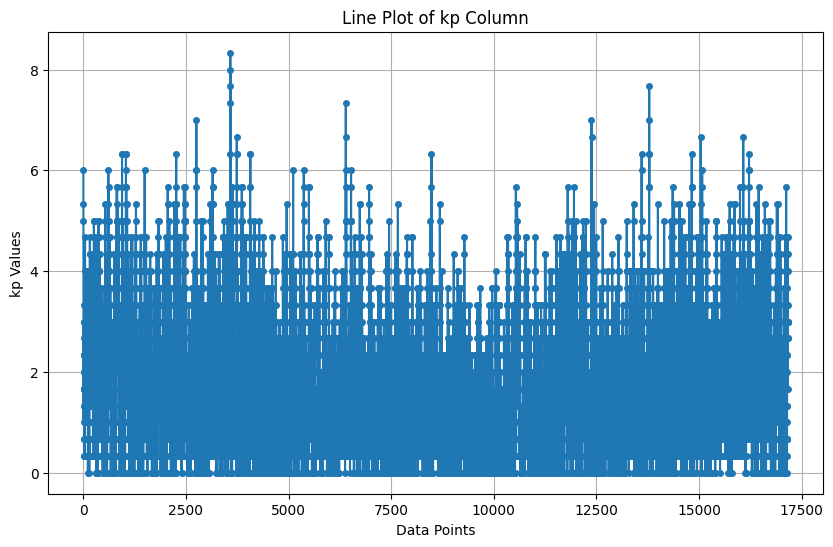

In [44]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(filtered_df['Kp'], linestyle='-', marker='o', markersize=4)  # Line plot with markers
plt.title('Line Plot of kp Column')  # Set the title
plt.xlabel('Data Points')  # Set the x-axis label
plt.ylabel('kp Values')  # Set the y-axis label
plt.grid(True)  # Display grid lines
plt.show()  # Show the plot

## Generating RNN

In [49]:
def create_train_window(values, group_size=20):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(0, len(values)-group_size-1):
        if(i < (len(values)-group_size-1)*0.8):
            x_train.append(values[i:group_size+i])
            y_train.append(values[i+group_size][-2])
        else:
            x_test.append(values[i:group_size+i])
            y_test.append(values[i+group_size][-2])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [75]:
filtered = filtered_df.dropna()

In [76]:
x_train, y_train, x_test, y_test = create_train_window(np.array(filtered), 40)
input_shape_w=np.shape(x_train[0])
input_shape_w

(40, 38)

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=10,            # Number of epochs with no improvement before stopping
    verbose=1,              # Verbosity level (1 for updates, 0 for silent)
    restore_best_weights=True  # Restore the best weights when stopping
)

In [78]:
model = keras.Sequential()
model.add(layers.LSTM(256, input_shape=input_shape_w, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128, return_sequences=False, dropout=0, recurrent_dropout=0))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40, 256)           302080    
                                                                 
 dropout_6 (Dropout)         (None, 40, 256)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               197120    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)               

In [79]:
model.fit(x_train, y_train, shuffle=True, batch_size=64, epochs=20, validation_split=0.3,callbacks=[early_stopping])

Epoch 1/20
27/27 [==============================] - 11s 229ms/step - loss: 2.2585 - accuracy: 0.0657 - val_loss: 1.5371 - val_accuracy: 0.0566
Epoch 2/20
27/27 [==============================] - 6s 235ms/step - loss: 1.6961 - accuracy: 0.0669 - val_loss: 1.4967 - val_accuracy: 0.0566
Epoch 3/20
27/27 [==============================] - 6s 205ms/step - loss: 1.7038 - accuracy: 0.0669 - val_loss: 1.5921 - val_accuracy: 0.0566
Epoch 4/20
27/27 [==============================] - 6s 220ms/step - loss: 1.7348 - accuracy: 0.0669 - val_loss: 1.4424 - val_accuracy: 0.0566
Epoch 5/20
27/27 [==============================] - 6s 227ms/step - loss: 1.6631 - accuracy: 0.0669 - val_loss: 1.4619 - val_accuracy: 0.0566
Epoch 6/20
27/27 [==============================] - 7s 253ms/step - loss: 1.6413 - accuracy: 0.0669 - val_loss: 1.3662 - val_accuracy: 0.0566
Epoch 7/20
27/27 [==============================] - 6s 219ms/step - loss: 1.7176 - accuracy: 0.0669 - val_loss: 1.5179 - val_accuracy: 0.0566
Epoch

In [80]:
y_test = [i for i in y_test if not np.isnan(i)]

In [81]:
y_prediction = model.predict(x_test)

19/19 [==============================] - 2s 35ms/step


In [70]:
# y_prediction_nan = [i for i in y_prediction if np.isnan(i)]

In [82]:
print(mean_absolute_error(y_test,y_prediction))
print(mean_squared_error(y_test,y_prediction))

1.051184065560994
1.626848189698951


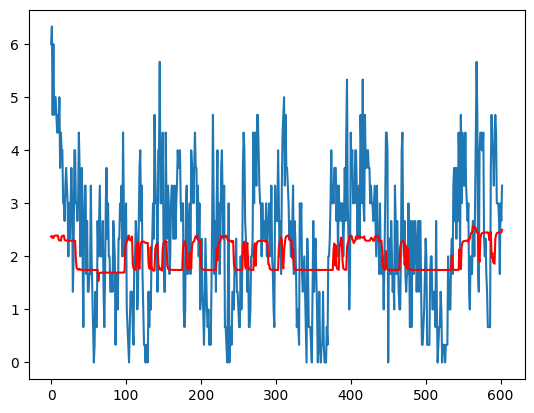

In [83]:
plt.plot(y_test)
plt.plot(y_prediction,c='r')

In [84]:
y_prediction

array([[2.374389 ],
       [2.3849685],
       [2.3492239],
       [2.344297 ],
       [2.383903 ],
       [2.389594 ],
       [2.391623 ],
       [2.392429 ],
       [2.3927565],
       [2.3917794],
       [2.3141332],
       [2.3020046],
       [2.2976277],
       [2.2959085],
       [2.3742373],
       [2.3860579],
       [2.39024  ],
       [2.3916364],
       [2.3138373],
       [2.3018827],
       [2.2975867],
       [2.2959025],
       [2.295235 ],
       [2.2949672],
       [2.2948616],
       [2.2948213],
       [2.294807 ],
       [2.2948034],
       [2.2948043],
       [2.294806 ],
       [2.2947628],
       [2.2947793],
       [2.2948253],
       [1.9520752],
       [1.782942 ],
       [1.7595785],
       [1.7549156],
       [1.747936 ],
       [1.7647569],
       [1.7489214],
       [1.7461258],
       [1.7444401],
       [1.7440339],
       [1.7440059],
       [1.7440184],
       [1.7440233],
       [1.7440218],
       [1.7440176],
       [1.7440134],
       [1.7440099],
